In [1]:
import os
from pathlib import Path
from buildings_bench import load_torch_dataset
from buildings_bench.transforms import TimestampTransform
import matplotlib.pyplot as plt
import numpy as np

base_path = "/pscratch/sd/n/nrushad"
os.environ["PATH"] = base_path
os.environ["BUILDINGS_BENCH"] = f"{base_path}/Dataset"

Dataset: borealis
Type: <class 'dict'>
{'home25': [(2011, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f0578e2bd00>)], 'home2': [(2011, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f057c1c8e20>)], 'home22': [(2011, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f057c30acb0>)], 'home14': [(2011, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f057c3083d0>)], 'home19': [(2011, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f057c30bfa0>)], 'home4': [(2011, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f057c3084f0>)], 'home9': [(2011, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f057c30a8f0>)], 'home23': [(2011, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f057c30b190>)], 'home16': [(2011, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f057c3091e0>)], 'home15': [(2011, <buildings_bench.data.datasets.TorchBuildingDataset ob

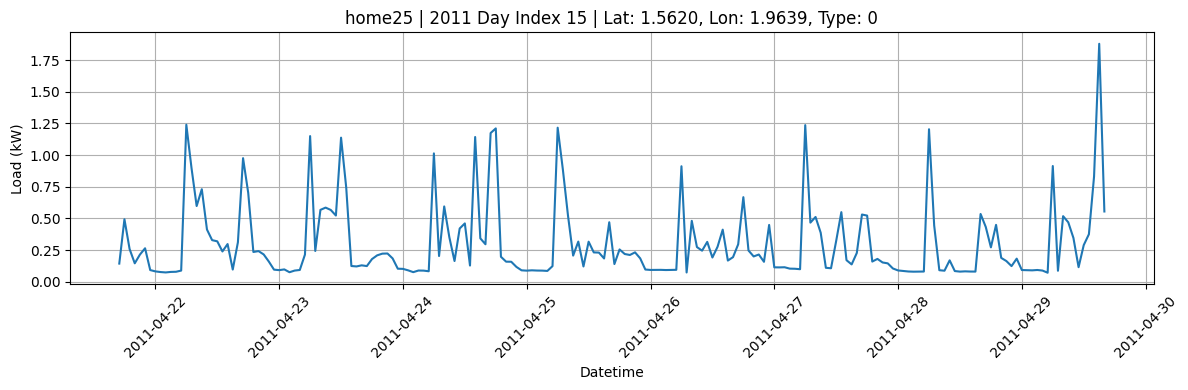

In [55]:
# Note: Dataset is incomplete (i.e. MT117 has only 2014) data

class EDA:
    def __init__(self, dataset_name, dataset):
        self.name = dataset_name
        self.datasets = dataset.building_datasets

    @staticmethod
    def reconstruct_datetime(data, year):
        timestamp = np.concatenate([
            data['day_of_year'],
            data['day_of_week'],
            data['hour_of_day']
        ], axis=-1)

        timestamp = TimestampTransform().undo_transform(timestamp)

        dt = (
            np.datetime64(f'{year}-01-01')
            + np.timedelta64(1, 'D') * (timestamp[..., 0] - 1)
            + np.timedelta64(1, 'h') * timestamp[..., -1]
        )

        return dt, timestamp

    def dataset_summary(self):
        print(f"Dataset: {self.name}")
        print(f"Type: {type(self.datasets)}")
        print(f"Building IDs: {list(self.datasets.keys())}")

    def building_summary(self, building_id, year):
        ds = dict(self.datasets[building_id])

        data_start = ds[year][0]
        data_end = ds[year][len(ds[year])]

        dt_start, _ = self.reconstruct_datetime(data_start, year)
        dt_end, _ = self.reconstruct_datetime(data_end, year)

        lat = float(data_start['latitude'][0][0])
        lon = float(data_start['longitude'][0][0])
        btype = int(data_start['building_type'][0][0])

        print(f"Building ID: {building_id}")
        print(f"Year: {year}")
        print(f"Number of records in {building_id}: {len(ds[year])}")
        print(f"Start date: {dt_start[0]}")
        print(f"End date: {dt_end[-1]}")
        print(f"Latitude: {lat:.4f}")
        print(f"Longitude: {lon:.4f}")
        print(f"Building Type: {btype}")

    def plot_load(self, building_id, year, day):
        ds = dict(self.datasets[building_id])

        if day < 0 or day >= len(ds[year]):
            print(f"Invalid day index: {day}. Valid range is 0 to {len(ds[year])-1}.")
            return

        data = ds[year][day]
        dt, _ = self.reconstruct_datetime(data, year)
        load = data['load'].squeeze()

        lat = float(data['latitude'][0][0])
        lon = float(data['longitude'][0][0])
        btype = int(data['building_type'][0][0])

        plt.figure(figsize=(12, 4))
        plt.plot(dt.astype('datetime64[m]'), load)
        plt.xlabel('Datetime')
        plt.ylabel('Load (kW)')
        plt.title(f"{building_id} | {year} Day Index {day} | Lat: {lat:.4f}, Lon: {lon:.4f}, Type: {btype}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid(True)
        plt.show()
               

# ["ideal", "electricity", "lcl", "sceaux", "borealis"]

# dataset_name = "ideal"
# dataset = load_torch_dataset(dataset_name, apply_scaler_transform='')
# eda = EDA(dataset_name, dataset)
# eda.dataset_summary()
# # 2017-2018
# eda.building_summary('home241', 2017)
# eda.plot_load('home241', 2017, day=5)

# dataset_name = "electricity"
# dataset = load_torch_dataset(dataset_name, apply_scaler_transform='')
# eda = EDA(dataset_name, dataset)
# eda.dataset_summary()
# # 2012-2014
# eda.building_summary('MT_061', 2014)
# eda.plot_load('MT_061', 2014, day=5)

# dataset_name = "lcl"
# dataset = load_torch_dataset(dataset_name, apply_scaler_transform='')
# eda = EDA(dataset_name, dataset)
# eda.dataset_summary()
# # 2012-2013
# eda.building_summary('MAC003538', 2012)
# eda.plot_load('MAC003538', 2012, day=5)

# dataset_name = "sceaux"
# dataset = load_torch_dataset(dataset_name, apply_scaler_transform='')
# eda = EDA(dataset_name, dataset)
# eda.dataset_summary()
# # 2007-2010
# eda.building_summary('Sceaux', 2008)
# eda.plot_load('Sceaux', 2008, day=15)

# dataset_name = "borealis"
# dataset = load_torch_dataset(dataset_name, apply_scaler_transform='')
# eda = EDA(dataset_name, dataset)
# eda.dataset_summary()
# # 2011
# eda.building_summary('home25', 2011)
# eda.plot_load('home25', 2011, day=15)